In [2]:
import pandas as pd
import os

# Set the current path to this file's location
current_path = %pwd
dataset_path = os.path.join(current_path, 'data/NYT_dataset.csv')

# Load the dataset
df = pd.read_csv(dataset_path)

# Print all unique values in the 'topic' column
unique_topics = df['topic'].unique()
print("Unique Topics:", unique_topics)

# Flatten the list of lists of keywords into a single list
all_keywords = df['keywords'].explode()

from collections import Counter
import ast

# Convert string representations of lists into actual lists, then flatten the list of lists into a single list of strings
flattened_keywords: list[str] = [keyword for sublist in all_keywords for keyword in ast.literal_eval(sublist)]
keyword_counts: Counter = Counter(flattened_keywords)
most_common_keywords: list[str] = [keyword for keyword, _ in keyword_counts.most_common(1000)]
most_common_keywords_counts: list[tuple[str, int]] = keyword_counts.most_common(1000)
print("100 Most Common Keywords:", most_common_keywords)
print("Keywords and Their Counts:", most_common_keywords_counts)


Unique Topics: ['Foreign' 'U.S.' 'Politics']


100 Most Common Keywords: ['Politics and Government', 'China', 'United States International Relations', 'United States', 'Elections', 'Terrorism', 'Trump, Donald J', 'Presidential Election of 2020', 'Russia', 'Defense and Military Forces', 'International Relations', 'United States Politics and Government', 'Coronavirus (2019-nCoV)', 'Israel', 'Great Britain', 'Deaths (Fatalities)', 'Syria', 'Obama, Barack', 'United States Defense and Military Forces', 'Iran', 'AFGHANISTAN', 'Middle East and North Africa Unrest (2010- )', 'Presidential Election of 2016', 'United Nations', 'France', 'Iraq', 'Palestinians', 'Afghanistan War (2001- )', 'European Union', 'Islamic State in Iraq and Syria (ISIS)', 'Pakistan', 'Democratic Party', 'Taliban', 'Demonstrations, Protests and Riots', 'North Korea', 'Human Rights and Human Rights Violations', 'Germany', 'India', 'Demonstrations, Protests, and Riots', 'Disease Rates', 'Nuclear Weapons', 'States (US)', 'Biden, Joseph R Jr', 'Putin, Vladimir V', 'Econom

In [7]:
import re
from collections import Counter

# Function to find all unicode characters in the dataset's abstracts, keywords, and titles
def find_unicode_characters_in_texts(texts: list[str]) -> list[str]:
    # Join all texts into a single string to search for unicode characters
    combined_text = "".join(texts)
    # Find all unicode characters using a regex that matches the encoded unicode format
    unicode_pattern = re.compile(r'[^\x00-\x7F]+')
    return unicode_pattern.findall(combined_text)

# Extract all unicode characters from the most common keywords, abstracts, and titles
abstracts: list[str] = df['abstract'].astype(str).tolist()
titles: list[str] = df['title'].astype(str).tolist()
combined_texts: list[str] = most_common_keywords + abstracts + titles
unicode_chars_in_texts: list[str] = find_unicode_characters_in_texts(combined_texts)

# Count the occurrences of each unicode character
unicode_char_counts: Counter = Counter(unicode_chars_in_texts)

# Print the most common unicode characters
print("Most Common Unicode Characters in Abstracts, Keywords, and Titles:", unicode_char_counts.most_common(10))


Most Common Unicode Characters in Abstracts, Keywords, and Titles: [('’', 60319), ('“', 8236), ('”', 8195), ('‘', 6051), ('—', 2969), ('á', 1186), ('é', 924), ('ó', 319), ('í', 314), ('ç', 256)]


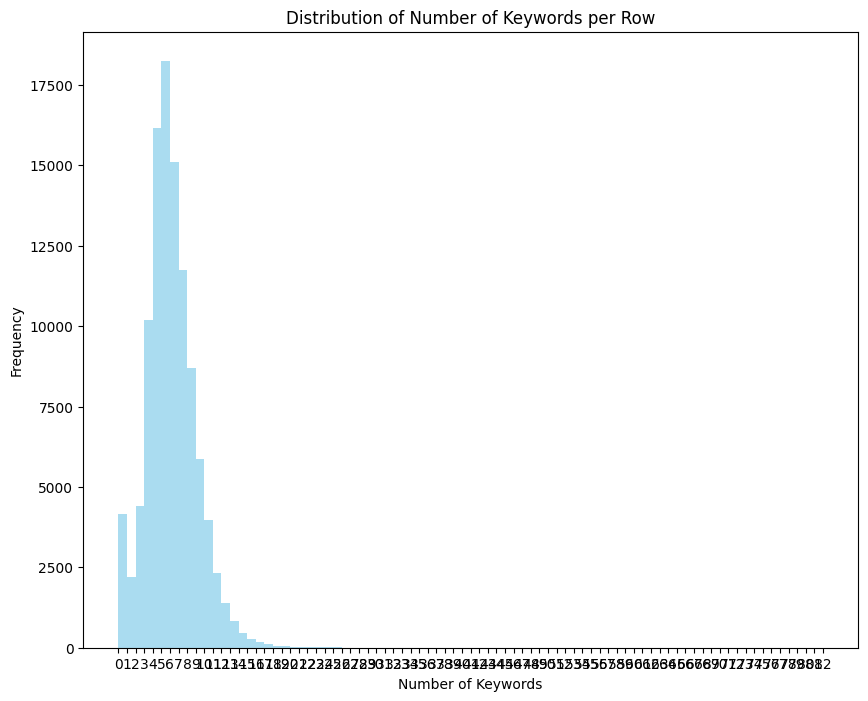

In [2]:
import matplotlib.pyplot as plt

# Count the number of keywords per row
keywords_per_row = df['keywords'].apply(lambda x: len(ast.literal_eval(x)))
date
# Create a histogram
plt.figure(figsize=(10, 8))
plt.hist(keywords_per_row, bins=range(min(keywords_per_row), max(keywords_per_row) + 1), color='skyblue', alpha=0.7)
plt.xlabel('Number of Keywords')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Keywords per Row')
plt.xticks(range(min(keywords_per_row), max(keywords_per_row) + 1))
plt.show()
